<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#机器学习&amp;深度学习03-K-Means聚类算法" data-toc-modified-id="机器学习&amp;深度学习03-K-Means聚类算法-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>机器学习&amp;深度学习03-K-Means聚类算法</a></span><ul class="toc-item"><li><span><a href="#算法简介" data-toc-modified-id="算法简介-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>算法简介</a></span></li><li><span><a href="#量化上述过程（可跳过该章节）" data-toc-modified-id="量化上述过程（可跳过该章节）-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>量化上述过程（可跳过该章节）</a></span></li><li><span><a href="#对-K-Means-算法的进一步解释（可跳过该章节）" data-toc-modified-id="对-K-Means-算法的进一步解释（可跳过该章节）-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>对 K-Means 算法的进一步解释（可跳过该章节）</a></span></li><li><span><a href="#对-K-means-算法的改进（可跳过该章节）" data-toc-modified-id="对-K-means-算法的改进（可跳过该章节）-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>对 K-means 算法的改进（可跳过该章节）</a></span></li><li><span><a href="#算法实现（Python版本）" data-toc-modified-id="算法实现（Python版本）-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>算法实现（Python版本）</a></span><ul class="toc-item"><li><span><a href="#数据prepare" data-toc-modified-id="数据prepare-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>数据prepare</a></span></li><li><span><a href="#数据可视化" data-toc-modified-id="数据可视化-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>数据可视化</a></span></li><li><span><a href="#随机初始化中心点" data-toc-modified-id="随机初始化中心点-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>随机初始化中心点</a></span></li><li><span><a href="#欧式距离" data-toc-modified-id="欧式距离-1.5.4"><span class="toc-item-num">1.5.4&nbsp;&nbsp;</span>欧式距离</a></span></li><li><span><a href="#更新中心点" data-toc-modified-id="更新中心点-1.5.5"><span class="toc-item-num">1.5.5&nbsp;&nbsp;</span>更新中心点</a></span></li><li><span><a href="#算法实现" data-toc-modified-id="算法实现-1.5.6"><span class="toc-item-num">1.5.6&nbsp;&nbsp;</span>算法实现</a></span></li><li><span><a href="#聚类过程可视化" data-toc-modified-id="聚类过程可视化-1.5.7"><span class="toc-item-num">1.5.7&nbsp;&nbsp;</span>聚类过程可视化</a></span></li></ul></li><li><span><a href="#算法实现（scikit-learn版本）" data-toc-modified-id="算法实现（scikit-learn版本）-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>算法实现（scikit-learn版本）</a></span></li><li><span><a href="#选择K值" data-toc-modified-id="选择K值-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>选择K值</a></span></li></ul></li></ul></div>

# 机器学习&深度学习03-K-Means聚类算法

## 算法简介

首先由用户确定划分子集的个数 K，然后随机选定 K 个点作为每一个子集的中心点，接下来通过迭代的方式：计算数据集中每个点与各个中心点之间的距离，最终将数据集划分为 K 个子集，即将数据划分为 K 类。

而评估划分的好坏标准就是：保证同一划分的样本之间的差异尽可能的小，且不同划分中的样本差异尽可能的大。

## 量化上述过程（可跳过该章节）

K-means 算法是一种聚类算法。为了更好的解释这个算法，首先我们假设给定的数据集为 $\{ x^{(1)}, x^{(2)}, \cdots, x^{(m)} \}, x^{(i)} \in \mathbb{R}^n$，注意数据是没有标签的。

（1）选择初始的 K 个聚类中心 $\mu_1, \mu_2, \dots, \mu_k \in \mathbb{R} ^ n$

（2）重复以下两步直到收敛（聚类中心不再变化或者变化低于阙值）：
  
- 计算每个样本到各个聚类中心的距离，并将其类别标号设为距其最近的聚类中心的标号，即：
    
    $$
    c^{(i)} := arg \underset{j}{min} \lVert x^{(i)} - \mu_j \rVert^2 \quad j = 1, 2, \dots k
    $$

    其中 $c^{(i)}$ 为第 i 个样例的类别标号。
    
- 更新聚类中心的值为相同类别的样本的平均值：
    
    $$
    \mu_j = \frac {\sum_{i=1}^m I\{c^{(i)}\ = j \}x^{(i)}}{\sum_{i=1}^m I\{ c^{(i)} = j\}}
    $$

    其中当 $c^{(i)}\ = j$ 时，$I\{c^{(i)}\ = j \} = 1$，当 $c^{(i)}\ \neq j$ 时，$I\{c^{(i)}\ = j \} = 0$。

## 对 K-Means 算法的进一步解释（可跳过该章节）

K-Means算法要优化的目标函数如下：

$$
J(c, \mu) = \sum_{i=1}^m \lVert x^{(i)} - \mu_{c^{(i)}} \rVert ^2
$$

（1）优化目标可以看成让所有点到其对应的聚类中心点的距离和最小。K-means 算法可以看成对目标函数 $J$ 的**坐标下降过程**，对应的解释如下：

   - 执行上述 2(1) 这一步的时候，相当于固定 $\mu$，改变 $c$（每个样本所对应的类别），改变的规则是样本到哪个聚类中心的距离最小就将对应的样本对应的 $c$ 改为哪类，所以 $J(c, \mu)$ 一定会减小。
   - 执行上述 2(2) 这一步的时候，相当于固定所有样本的 $c$，重新计算各个类别的中心，进一步使 $J(c, \mu)$ 减小。

（2）目标函数 $J$ 不是一个凸函数，因此 K-means 算法不能保证收敛到全局最优解，一个简单的方法就是随机初始化多次，以最优的聚类结果作为最终的结果。

（3）聚类结束后，如果一个中心没有任何相关的样本，那么这个中心就应该去掉，或者重新聚类。

## 对 K-means 算法的改进（可跳过该章节）
1. **K-means++ 算法**对 K 个初始聚类中心的选取做了改进，各个聚类中心之间的距离越远越好。
    - 随机选取一个聚类中心
    - 计算每个样本到所有已知聚类中心的最短距离 $D(x)$
    - 计算每个样本被选为下一个聚类中心的概率 $\frac{D^2(x)}{\Sigma_{x \in X}D^2(x)}$
    - 确定每个样本被选为下一个聚类中心的概率区间
    - 生成一个 0~1 的随机数，选取该随机数对应区间的样本作为下一个聚类中心
    - 重复以上过程，直到选取了 K 个聚类中心


2. 为了克服 K-means 聚类算法容易陷入局部最小值的问题和提高聚类的性能，提出了**二分 K-means 聚类算法**。该算法基本思想是首先将所有的样本点划分到一个簇，然后将该簇一分为二，之后选择其中一个簇继续进行划分，直到得到用户指定的簇数目为止。选择哪个簇进行划分取决于对其划分是否可以最大程度的降低 SSE（误差平方和）。

## 算法实现（Python版本）

### 数据prepare

函数：
``` Python
data,label = sklearn.datasets.make_blobs(n_samples=100,n_features=2,centers=3,center_box=(-10.0,10.0),random_state=None)   

```
参数含义：
- n_samples：表示生成数据总个数,默认为 100 个。
- n_features：表示每一个样本的特征个数，默认为 2 个。
- centers：表示中心点的个数，默认为 3 个。
- center_box：表示每一个中心的边界,默认为 -10.0 到 10.0。
- random_state：表示生成数据的随机数种子。

In [1]:
from sklearn.datasets import make_blobs

# 构造示例数据
blobs, _ = make_blobs(n_samples=200, centers=3, random_state=18)
blobs[:10]
print(blobs[:10])

[[ 8.28390539  4.98011149]
 [ 7.05638504  7.00948082]
 [ 7.43101466 -6.56941148]
 [ 8.20192526 -6.4442691 ]
 [ 3.15614247  0.46193832]
 [ 7.7037692   6.14317389]
 [ 5.62705611 -0.35067953]
 [ 7.53828533 -4.86595492]
 [ 8.649291    3.98488194]
 [ 7.91651636  4.54935348]]


### 数据可视化

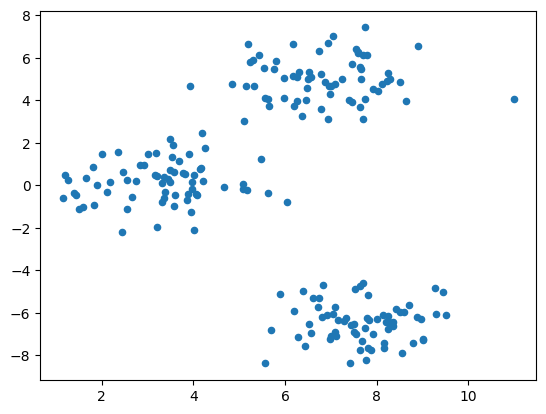

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# s=20: 点的大小
plt.scatter(blobs[:, 0], blobs[:, 1], s=20)

### 随机初始化中心点

In [3]:
import numpy as np


def random_k(k, data):
    """随机选择k个中心点"""
    # 初始化中心点
    prng = np.random.RandomState(27)
    num_feature = np.shape(data)[1]
    
    # 用于生成服从标准正态分布（均值为0，标准差为1）的随机数，为了更加贴近数据集这里乘了一个 5
    init_centers = prng.randn(k, num_feature) * 5
    
    return init_centers


init_centers = random_k(3, blobs)
init_centers

array([[ 6.42802708, -1.51776689],
       [ 3.09537831,  1.97999275],
       [ 1.11702824, -0.27169709]])

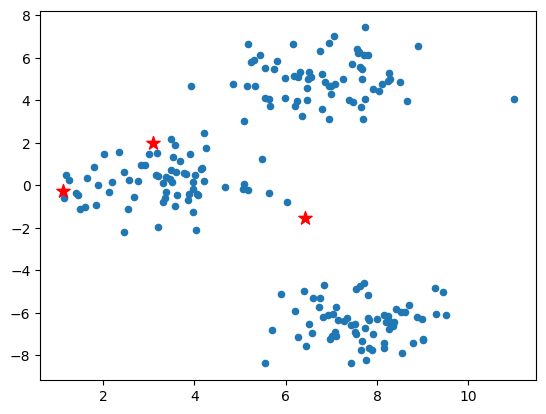

In [4]:
# 初始中心点展示
plt.scatter(blobs[:, 0], blobs[:, 1], s=20)
plt.scatter(init_centers[:, 0], init_centers[:, 1], s=100, marker='*', c="r")

### 欧式距离

In [5]:
def d_euc(x, y):
    """计算样本与中心点的距离：欧式距离"""
    d = np.sqrt(np.sum(np.square(x - y)))
    return d

### 更新中心点

In [6]:
import numpy as np


def update_center(clusters, data, centers):
    """更新中心点
    参数:
    clusters -- 每一点分好的类别，数据格式：[1, 0, 0, 2, 1, 0, ...]
    data -- 数据集
    centers -- 中心点集合

    返回:
    new_centers.reshape(num_centers,num_features) -- 新中心点集合
    """
    # num_centers: 中心点的个数
    # num_features: 每一个中心点的特征数
    num_centers, num_features = np.shape(centers)
    
    # 首先创建一个容器将相同类别数据存放到一起
    container = []
    for x in range(num_centers):
        each_container = []
        container.append(each_container)

    for i, cluster in enumerate(clusters):
        container[cluster].append(data[i])

    # 创建一个容器，存放中心点的坐标
    new_centers = np.array([])
    
    # 计算每一子集中数据均值作为中心点
    for i in range(len(container)):
        each_center = np.mean(container[i], axis=0)
        new_centers = np.append(new_centers, each_center)

    return new_centers.reshape(num_centers, num_features)

### 算法实现

In [7]:
def kmeans_cluster(data, init_centers, k):
    """
    参数:
    data -- 数据集
    init_centers -- 初始化中心点集合
    k -- 中心点个数

    返回:
    centers_container -- 每一次更新中心点的集合
    cluster_container -- 每一次更新类别的集合
    """
    max_step = 50    # 最大迭代次数
    epsilon = 0.001  # 定义一个足够小的数，通过中心点变化的距离是否小于该数，判断中心点是否变化

    old_centers = init_centers

    centers_container = []  # 建立一个中心点容器，存放每一次变化后的中心点，以便后面的绘图
    cluster_container = []  # 建立一个分类容器，存放每一次中心点变化后数据的类别
    centers_container.append(old_centers)

    for step in range(max_step):
        cluster = np.array([], dtype=int)
        # 遍历数据集
        for each_data in data:
            distances = np.array([])
            # 遍历中心点
            for each_center in old_centers:
                # 计算样本和中心点的欧式距离
                temp_distance = d_euc(each_data, each_center)
                distances = np.append(distances, temp_distance)
            # 返回距离最近中心点的索引，即按照最近中心点分类
            lab = np.argmin(distances)
            cluster = np.append(cluster, lab)
        cluster_container.append(cluster)
        
        # 根据子集分类更新中心点
        new_centers = update_center(cluster, data, old_centers)

        # 计算每个中心点更新前后之间的欧式距离
        difference = []
        for each_old_center, each_new_center in zip(old_centers, new_centers):
            difference.append(d_euc(each_old_center, each_new_center))
        
        # 判断每个中心点移动是否均小于 epsilon => 提前结束
        if (np.array(difference) < epsilon).all():
            return centers_container, cluster_container

        centers_container.append(new_centers)
        old_centers = new_centers

    return centers_container, cluster_container

In [8]:
# 计算最终中心点
centers_container, cluster_container = kmeans_cluster(blobs, init_centers, 3)
final_center = centers_container[-1]
final_cluster = cluster_container[-1]
final_center

array([[ 7.67007252, -6.44697348],
       [ 6.83832746,  4.98604668],
       [ 3.28477676,  0.15456871]])

### 聚类过程可视化

Text(0.5, 1.0, 'final center')

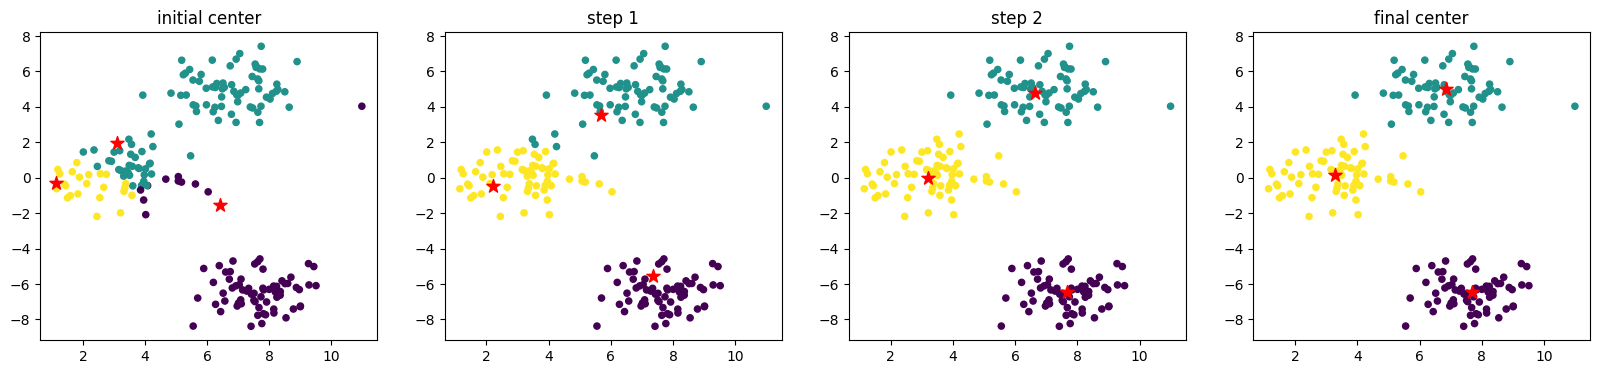

In [9]:
num_axes = len(centers_container)

fig, axes = plt.subplots(1, num_axes, figsize=(20, 4))

axes[0].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[0])
axes[0].scatter(init_centers[:, 0], init_centers[:, 1], s=100, marker='*', c="r")
axes[0].set_title("initial center")

for i in range(1, num_axes - 1):
    axes[i].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[i])
    axes[i].scatter(centers_container[i][:, 0], centers_container[i][:, 1], s=100, marker='*', c="r")
    axes[i].set_title("step {}".format(i))

axes[-1].scatter(blobs[:, 0], blobs[:, 1], s=20, c=cluster_container[-1])
axes[-1].scatter(final_center[:, 0], final_center[:, 1], s=100, marker='*', c="r")
axes[-1].set_title("final center")

## 算法实现（scikit-learn版本）

centers: [[ 7.67007252 -6.44697348]
 [ 3.28477676  0.15456871]
 [ 6.83832746  4.98604668]]
clusters_info: [2 2 0 0 1 2 1 0 2 2 2 2 1 1 1 1 0 2 1 2 1 2 2 2 0 2 2 2 0 0 2 2 0 0 1 1 0
 2 2 2 0 2 2 0 0 1 2 1 2 0 2 0 0 0 2 2 0 1 0 1 2 1 1 2 0 2 1 1 1 2 1 0 0 2
 1 0 2 1 2 0 2 1 2 1 2 1 2 1 0 0 1 0 2 0 2 2 0 0 1 2 1 0 1 1 0 1 2 0 1 1 2
 1 1 1 0 0 2 2 0 2 1 1 0 0 0 1 1 0 2 2 0 0 1 1 2 1 2 0 0 0 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 1 0 2 0 0 1 1 1 0 1 2 2 2 1 2 1 1 1 0 1 2 2 1 0 2 0 0 1 2 1 0
 0 1 1 0 2 2 0 0 0 2 2 2 2 1 1]


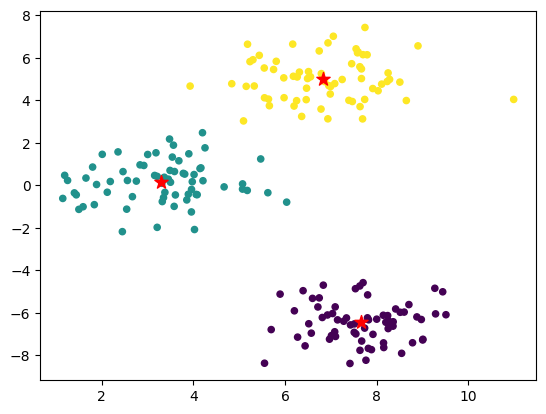

In [10]:
from sklearn.cluster import k_means
model = k_means(blobs, n_clusters=3)

centers = model[0]
clusters_info = model[1]
print("centers: {}".format(centers))
print("clusters_info: {}".format(clusters_info))

plt.scatter(blobs[:, 0], blobs[:, 1], s=20, c=clusters_info)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='*', c="r")

## 选择K值

inertia: [5528.75650809076, 1614.226718479276, 418.26184344823554, 369.71731833012996, 330.66460356217317, 279.9143896104324]


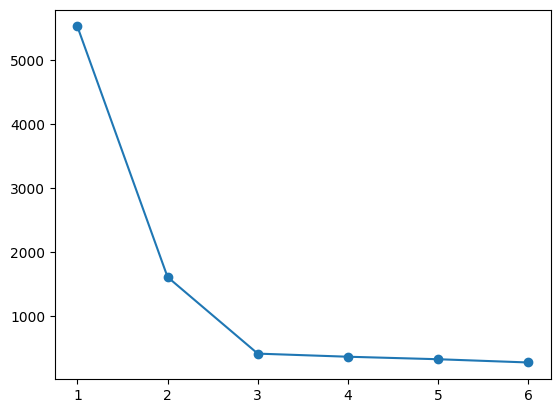

In [11]:
index = []  # 横坐标数组
inertia = []  # 纵坐标数组

# K 从 1~ 6 聚类
for i in range(6):
    model = k_means(blobs, n_clusters=i + 1)
    index.append(i + 1)
    inertia.append(model[2])
    
print("inertia: {}".format(inertia))

# 绘制折线图
plt.plot(index, inertia, "-o")